<a href="https://colab.research.google.com/github/moh2236945/Dstl-Satellite-Imagery-Feature-Detection/blob/master/dstl_satellite_imagery_feature_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import glob   #The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell, although results are returned in arbitrary order. 
#import geoplot  #geospatial data visualization
#import geopandas as gpd  
#The goal of GeoPandas is to make working with geospatial data in python easier. It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in python that would otherwise require a spatial database such as PostGIS.
import numpy as np
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt
fig_width,fig_height = 10,10


In [11]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then copy kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

Saving kaggle.json to kaggle (1).json
User uploaded file "kaggle.json" with length 68 bytes
kaggle.json


In [15]:
!kaggle competitions download -c dstl-satellite-imagery-feature-detection

  0% 0.00/14.9k [00:00<?, ?B/s]
100% 14.9k/14.9k [00:00<00:00, 12.6MB/s]
100% 7.30G/7.30G [01:50<00:00, 56.6MB/s]
100% 7.30G/7.30G [01:50<00:00, 70.9MB/s]
 45% 5.00M/11.1M [00:00<00:00, 38.8MB/s]
100% 11.1M/11.1M [00:00<00:00, 54.3MB/s]
  0% 0.00/2.17k [00:00<?, ?B/s]
100% 2.17k/2.17k [00:00<00:00, 8.28MB/s]
100% 12.9G/12.9G [03:50<00:00, 36.9MB/s]
100% 12.9G/12.9G [03:50<00:00, 60.0MB/s]
 63% 9.00M/14.2M [00:00<00:00, 17.8MB/s]
100% 14.2M/14.2M [00:00<00:00, 26.4MB/s]


In [0]:
import geopandas


In [21]:
!unzip /content/grid_sizes.csv.zip

Archive:  /content/grid_sizes.csv.zip
  inflating: grid_sizes.csv          


In [22]:
!unzip /content/sixteen_band.zip
!unzip /content/three_band.zip
!unzip /content/train_geojson_v3.zip
!unzip /content/train_wkt_v4.csv.zip

Archive:  /content/sixteen_band.zip
  inflating: sixteen_band/6010_0_0_A.tif  
  inflating: sixteen_band/6010_0_0_M.tif  
  inflating: sixteen_band/6010_0_0_P.tif  
  inflating: sixteen_band/6010_0_1_A.tif  
  inflating: sixteen_band/6010_0_1_M.tif  
  inflating: sixteen_band/6010_0_1_P.tif  
  inflating: sixteen_band/6010_0_2_A.tif  
  inflating: sixteen_band/6010_0_2_M.tif  
  inflating: sixteen_band/6010_0_2_P.tif  
  inflating: sixteen_band/6010_0_3_A.tif  
  inflating: sixteen_band/6010_0_3_M.tif  
  inflating: sixteen_band/6010_0_3_P.tif  
  inflating: sixteen_band/6010_0_4_A.tif  
  inflating: sixteen_band/6010_0_4_M.tif  
  inflating: sixteen_band/6010_0_4_P.tif  
  inflating: sixteen_band/6010_1_0_A.tif  
  inflating: sixteen_band/6010_1_0_M.tif  
  inflating: sixteen_band/6010_1_0_P.tif  
  inflating: sixteen_band/6010_1_1_A.tif  
  inflating: sixteen_band/6010_1_1_M.tif  
  inflating: sixteen_band/6010_1_1_P.tif  
  inflating: sixteen_band/6010_1_2_A.tif  
  inflating: sixte

In [24]:
data_path='/content/three_band/*'
len(glob.glob(data_path,recursive=True))

450

In [0]:
# Convenience function takle from 
## Take the convenience function from https://github.com/rogerxujiang/dstl_unet/blob/master/utils/data_utils.py

def scale_percentile(img):
    '''
    Scale an image's 1 - 99 percentiles into 0 - 1 for display
    :param img:
    :return:
    '''
    orig_shape = img.shape
    if len(orig_shape) == 3:
        img = np.reshape(img,
                         [orig_shape[0] * orig_shape[1], orig_shape[2]]
                         ).astype(np.float32)
    elif len(orig_shape) == 2:
        img = np.reshape(img, [orig_shape[0] * orig_shape[1]]).astype(np.float32)
    mins = np.percentile(img, 1, axis = 0)
    maxs = np.percentile(img, 99, axis = 0) - mins

    img = (img - mins) / maxs

    img.clip(0., 1.)
    img = np.reshape(img, orig_shape)

    return img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


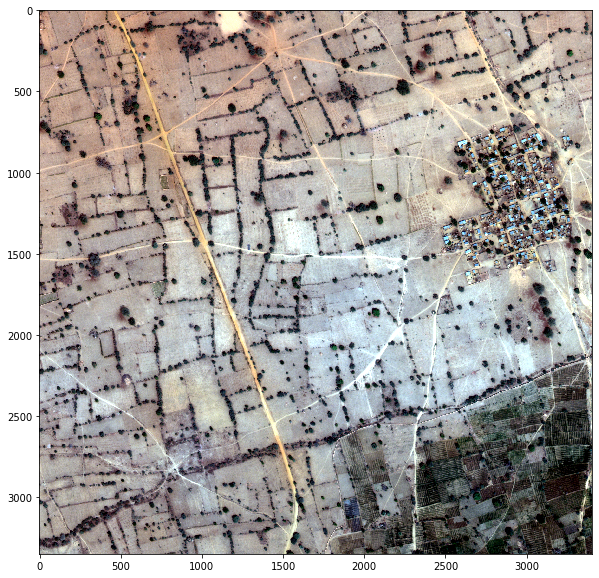

In [32]:
tile = '6030_4_1'
image_file=f'/content/three_band/{tile}.tif'
im = io.imread(image_file)
f, ax = plt.subplots(1, 1, figsize=(fig_width, fig_height))
ax.imshow(scale_percentile(im));